In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### Блок про линейные модели. Введение.

#### Распределение №1

In [2]:
random_gen = np.random.RandomState(42)

In [3]:
random_gen.rand(50)

array([ 0.37454012,  0.95071431,  0.73199394,  0.59865848,  0.15601864,
        0.15599452,  0.05808361,  0.86617615,  0.60111501,  0.70807258,
        0.02058449,  0.96990985,  0.83244264,  0.21233911,  0.18182497,
        0.18340451,  0.30424224,  0.52475643,  0.43194502,  0.29122914,
        0.61185289,  0.13949386,  0.29214465,  0.36636184,  0.45606998,
        0.78517596,  0.19967378,  0.51423444,  0.59241457,  0.04645041,
        0.60754485,  0.17052412,  0.06505159,  0.94888554,  0.96563203,
        0.80839735,  0.30461377,  0.09767211,  0.68423303,  0.44015249,
        0.12203823,  0.49517691,  0.03438852,  0.9093204 ,  0.25877998,
        0.66252228,  0.31171108,  0.52006802,  0.54671028,  0.18485446])

In [4]:
t_distr = random_gen.rand(10000)

print ('mean: ',np.mean(t_distr))
print ('variance: ',np.var(t_distr))

mean:  0.494429296626
variance:  0.0828443762857


In [5]:
1/12

0.08333333333333333

(array([ 1033.,  1008.,  1009.,  1005.,  1015.,  1030.,  1006.,   925.,
         1005.,   964.]),
 array([  1.16347554e-05,   9.99822386e-02,   1.99952842e-01,
          2.99923446e-01,   3.99894050e-01,   4.99864654e-01,
          5.99835258e-01,   6.99805862e-01,   7.99776466e-01,
          8.99747069e-01,   9.99717673e-01]),
 <a list of 10 Patch objects>)

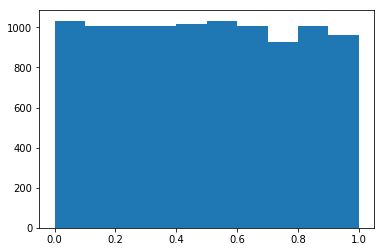

In [6]:
plt.hist(t_distr)

#### Распределение №2

In [7]:
t_distr = random_gen.randn(10000)
print ('mean: ',np.mean(t_distr))
print ('variance: ',np.var(t_distr))

mean:  0.0118693281948
variance:  1.00001978437


(array([  1.30000000e+01,   1.16000000e+02,   6.63000000e+02,
          2.03600000e+03,   3.24800000e+03,   2.56000000e+03,
          1.11500000e+03,   2.25000000e+02,   2.30000000e+01,
          1.00000000e+00]),
 array([-3.92240025, -3.0822518 , -2.24210335, -1.4019549 , -0.56180645,
         0.278342  ,  1.11849045,  1.9586389 ,  2.79878735,  3.6389358 ,
         4.47908425]),
 <a list of 10 Patch objects>)

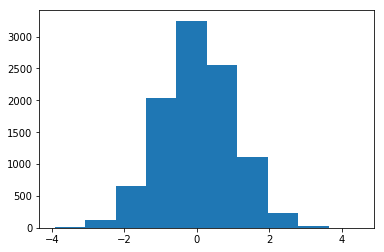

In [8]:
plt.hist(t_distr)

### Сгенерируем выборку X

In [9]:
X = 10 * random_gen.rand(50)
X

array([ 5.07802885,  9.06789404,  1.59441412,  6.89754641,  5.93859265,
        7.48585727,  1.50600273,  9.41605337,  6.20966428,  8.47071138,
        2.46606764,  7.39412889,  7.81030704,  3.97435272,  3.83953453,
        6.57796265,  0.93407682,  7.3562415 ,  0.4288676 ,  1.90590301,
        6.64143757,  0.98323667,  9.71842091,  8.68396209,  6.26302332,
        8.19057456,  8.87580049,  2.5947565 ,  8.49411588,  1.94793784,
        4.13342264,  5.58259631,  7.13890963,  0.30141318,  2.90509413,
        6.08519098,  3.57368679,  7.75025056,  6.51652161,  2.34401454,
        1.4592898 ,  6.29046994,  4.50467328,  1.68957041,  3.26374205,
        3.03046748,  1.08131972,  5.46909019,  7.63648634,  5.75466889])

### Сгенерируем выборку y

In [10]:
y = - 10 * X + 3 + 5 * random_gen.randn(50)
y

array([-48.52306555, -87.02818508,  -2.8536575 , -71.91346968,
       -50.42975052, -66.50428468,  -7.78844065, -84.70179444,
       -57.69376795, -84.62176125, -16.18780991, -65.27707788,
       -69.57650093, -36.52101683, -38.97631786, -61.82281523,
        -1.62961809, -65.44065607,  -3.43705662, -14.48216563,
       -69.95826725,  -1.90761619, -98.10075293, -79.91334415,
       -65.37675613, -73.74866603, -84.14882891, -26.85435344,
       -78.48437689, -19.43118682, -34.58645123, -54.1965205 ,
       -76.99433194,  -4.92621297, -28.20301482, -51.0109647 ,
       -28.23114976, -66.3831985 , -53.89704003, -23.1138994 ,
       -12.53533226, -61.96109898, -45.4042858 , -23.10317766,
       -29.71115912, -33.7325028 ,  -7.98405664, -41.11204788,
       -75.91158887, -53.57281886])

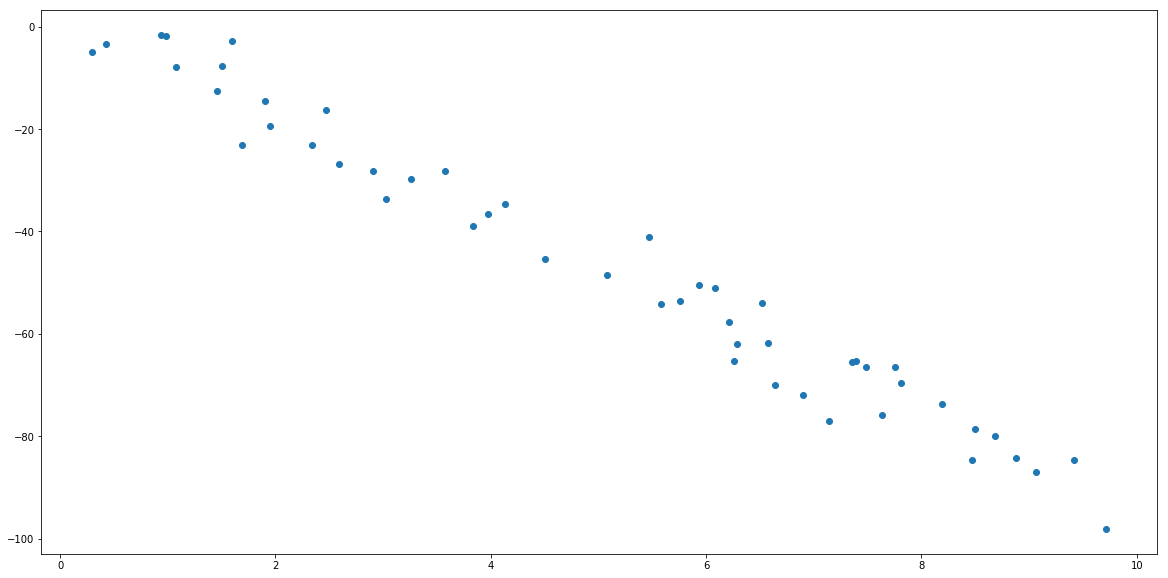

In [11]:
plt.figure(figsize=(20,10))
plt.scatter(X, y)

In [12]:
X_with_bias = np.vstack([np.ones(X.shape[0]), X]).T

### Проимпортируем написанные функции из первой домашней работы

In [13]:
from sem2_ut import mserror, normal_equation, linear_prediction

In [14]:
w = normal_equation(X_with_bias, y)

In [15]:
w

array([ 2.49184303, -9.7312322 ])

In [16]:
y_prediction = linear_prediction(X_with_bias, w)

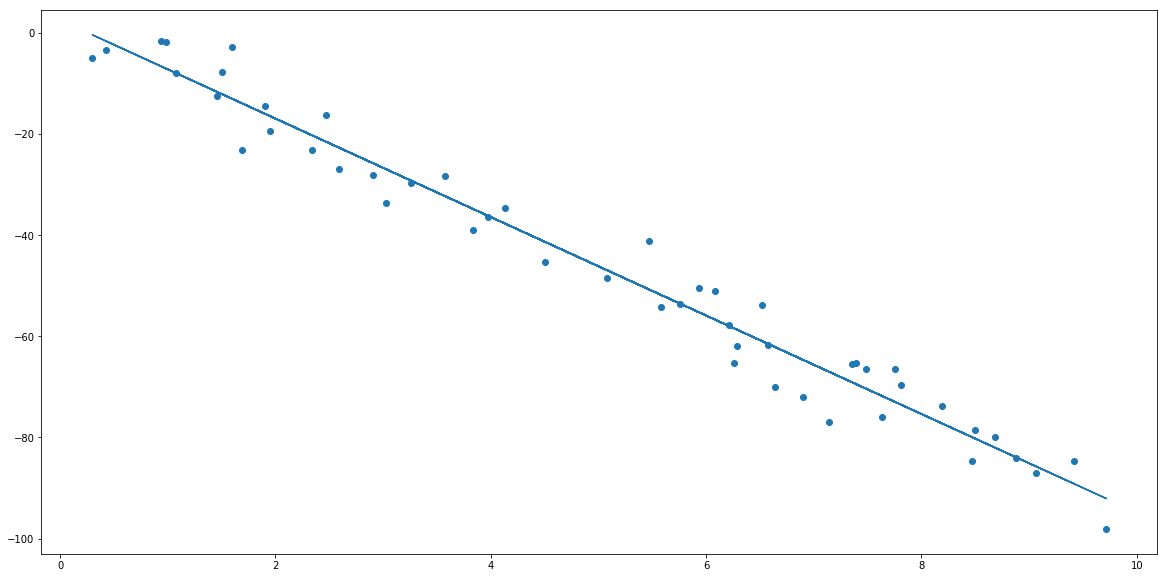

In [17]:
plt.figure(figsize=(20,10))
plt.scatter(X, y)
plt.plot(X, y_prediction)

### Какую мы допустили ошибку?

## Мы проверяли и обучали алгоритм на одном и том же множестве объектов X

### Разберем более сложный пример

In [18]:
X = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
y = np.sin(X) + 0.1 * np.power(X, 2) + 0.5 * np.random.randn(100, 1)
X /= np.max(X)

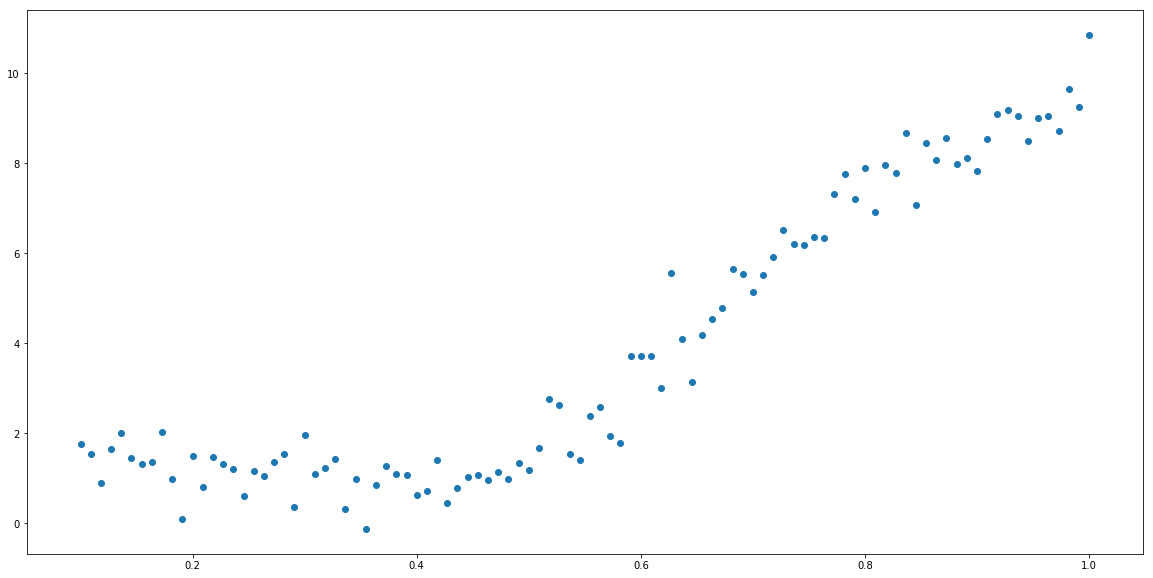

In [19]:
plt.figure(figsize=(20,10))
plt.scatter(X, y)

In [20]:
X = np.hstack((np.ones_like(X), X))

In [21]:
order = np.random.permutation(len(X))
portion = 20
test_x = X[order[:portion]]
test_y = y[order[:portion]]
train_x = X[order[portion:]]
train_y = y[order[portion:]]

In [22]:
def get_gradient(w, x, y):
    y_estimate = x.dot(w).flatten()
    error = (y.flatten() - y_estimate)
    mse = (1.0/len(x))*np.sum(np.power(error, 2))
    gradient = -(1.0/len(x)) * error.dot(x)
    return gradient, mse

In [23]:
w = np.random.randn(2)
alpha = 0.5
tolerance = 1e-5

iterations = 1
while True:
    gradient, error = get_gradient(w, train_x, train_y)
    new_w = w - alpha * gradient
    
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print ("Converged.")
        break
    
    # Print error every 50 iterations
    if iterations % 100 == 0:
        print ("Iteration: %d - Error: %.4f" %(iterations, error))
    
    iterations += 1
    w = new_w

print ("w =",w)
print ("Test Cost =", get_gradient(w, test_x, test_y)[1])

Iteration: 100 - Error: 1.7008
Iteration: 200 - Error: 1.6709
Iteration: 300 - Error: 1.6708
Converged.
w = [ -1.97409241  10.84440538]
Test Cost = 1.82754178345


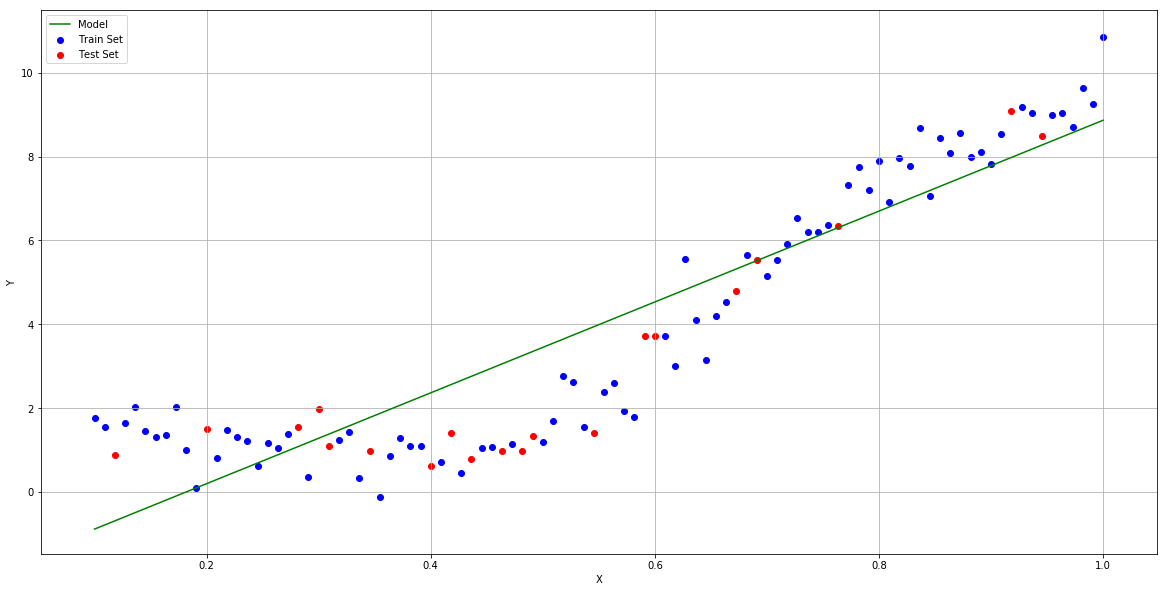

In [25]:
plt.figure(figsize=(20,10))
plt.plot(X[:,1], X.dot(w), c='g', label='Model')
plt.scatter(train_x[:,1], train_y, c='b', label='Train Set')
plt.scatter(test_x[:,1], test_y, c='r', label='Test Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

C:\Users\Misha\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label'
  s)


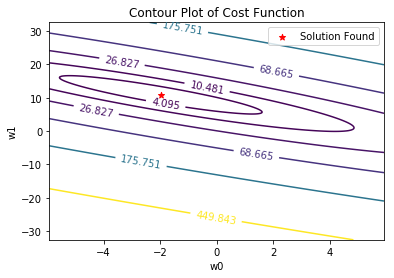

In [26]:
w1 = np.linspace(-w[1]*3, w[1]*3, 300)
w0 = np.linspace(-w[0]*3, w[0]*3, 300)
J_vals = np.zeros(shape=(w1.size, w0.size))

for t1, element in enumerate(w1):
    for t2, element2 in enumerate(w0):
        wT = [0, 0]
        wT[1] = element
        wT[0] = element2
        J_vals[t1, t2] = get_gradient(wT, train_x, train_y)[1]

plt.scatter(w[0], w[1], marker='*', color='r', s=40, label='Solution Found')
CS = plt.contour(w0, w1, J_vals, np.logspace(-10,10,50), label='Cost Function')
plt.clabel(CS, inline=1, fontsize=10)
plt.title("Contour Plot of Cost Function")
plt.xlabel("w0")
plt.ylabel("w1")
plt.legend(loc='best')
plt.show()